# Exploratory Data Analysis of Microcoleus anatoxicus Images

This notebook aims to:
- List and display all images in the dataset directory.
- Verify the class distribution.
- Compute basic size statistics and visualize sample images.

## 1. Imports & Setup

In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

# Set a deterministic random seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)

# Define the directory containing raw images and supported file extensions
data_dir = "../data/raw/Switzerland"
img_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')


## 2. Identify Classes

In [2]:
# Detect subdirectories in `data_dir` that represent image classes
classes = [
    d for d in os.listdir(data_dir)
    if not d.startswith('.') and os.path.isdir(os.path.join(data_dir, d))
]
print(f"Detected classes: {classes}")

Detected classes: ['non_toxic', 'toxic']


## 3. Count Images per Class

In [3]:
# Count how many image files each class contains
image_count = {}
for cls in classes:
    cls_folder = os.path.join(data_dir, cls)
    imgs = [
        f for f in os.listdir(cls_folder)
        if f.lower().endswith(img_extensions)
    ]
    image_count[cls] = len(imgs)

print("Number of images per class:", image_count)

Number of images per class: {'non_toxic': 285, 'toxic': 276}


## 4. Visualize Class Distribution

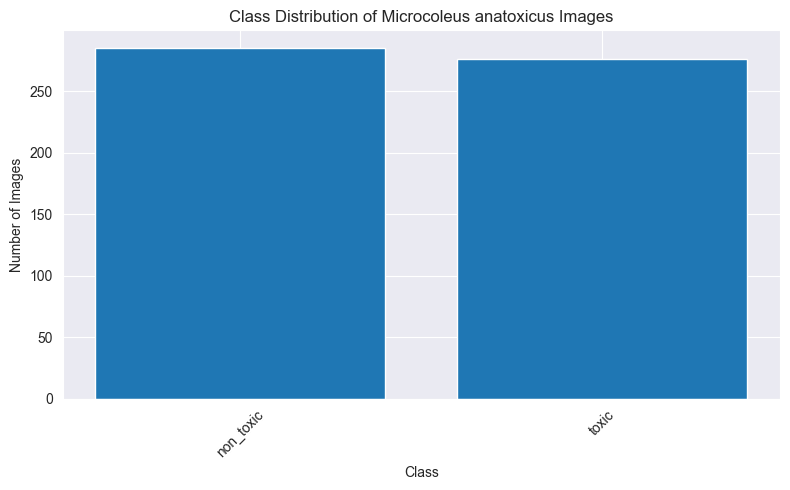

In [4]:
# Plot a bar chart of image counts for each class
plt.figure(figsize=(8, 5))
plt.bar(image_count.keys(), image_count.values())
plt.title("Class Distribution of Microcoleus anatoxicus Images")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Display Sample Images

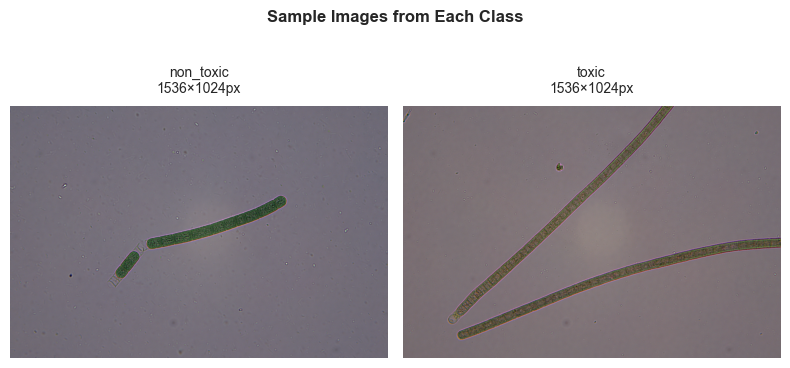

In [5]:
# Show example images (one per class)
n_show = len(classes)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
fig, axes = plt.subplots(1, n_show, figsize=(4 * n_show, 4))
if n_show == 1:
    axes = [axes]

for ax, cls in zip(axes, classes[:n_show]):
    cls_folder = os.path.join(data_dir, cls)
    imgs = [
        f for f in os.listdir(cls_folder)
        if f.lower().endswith(img_extensions)
    ]
    if imgs:
        img_name = random.choice(imgs)
        img_path = os.path.join(cls_folder, img_name)
        with Image.open(img_path) as img:
            ax.imshow(img, aspect='equal')
            ax.set_title(f"{cls}\n{img.width}×{img.height}px",
                        pad=10, fontsize=10)

    ax.axis("off")
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#dddddd')

fig.suptitle("Sample Images from Each Class",
             y=1.02, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Image Size Statistics


Total images processed: 561
Average image size: 1536.0 × 1024.0 pixels
Unique width values: [1536]
Unique height values: [1024]


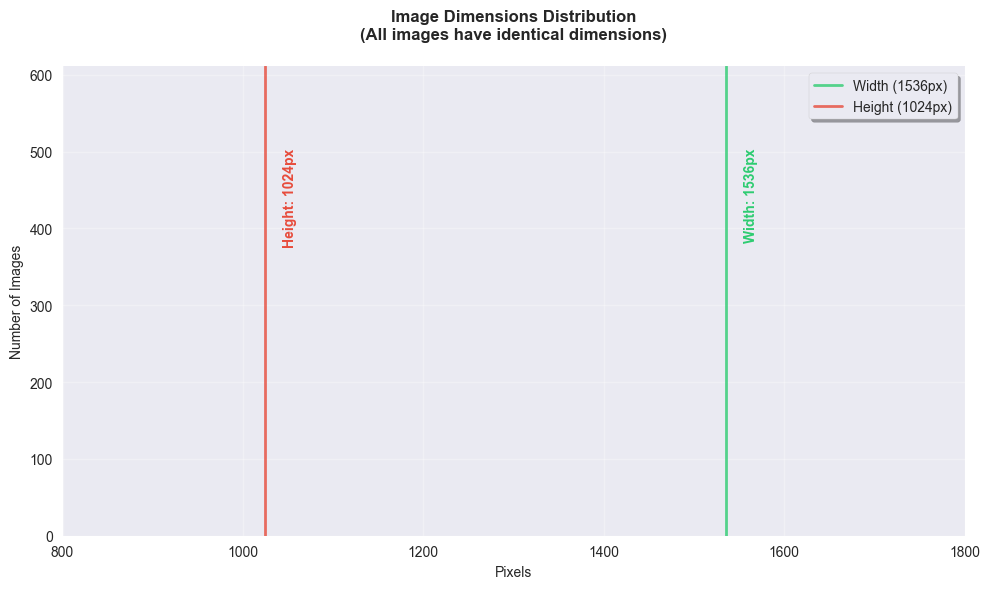

In [6]:
# Gather widths and heights of all images
widths = []
heights = []

for cls in classes:
    cls_folder = os.path.join(data_dir, cls)
    for fname in os.listdir(cls_folder):
        if not fname.lower().endswith(img_extensions):
            continue
        try:
            with Image.open(os.path.join(cls_folder, fname)) as img:
                widths.append(img.width)
                heights.append(img.height)
        except Exception as e:
            print(f"Warning: could not open {fname}: {e}")

print(f"\nTotal images processed: {len(widths)}")

if len(widths) == 0:
    print("No images were found!")
else:
    # Compute and display average dimensions
    avg_w, avg_h = np.mean(widths), np.mean(heights)
    print(f"Average image size: {avg_w:.1f} × {avg_h:.1f} pixels")

    # Check unique dimensions
    unique_widths = set(widths)
    unique_heights = set(heights)
    print(f"Unique width values: {sorted(unique_widths)}")
    print(f"Unique height values: {sorted(unique_heights)}")

    # Create a new figure
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set y-axis to show number of images
    ax.set_ylim(0, len(widths) + 50)

    # Plot vertical lines
    ax.axvline(x=widths[0], color='#2ecc71', linewidth=2, label='Width (1536px)', alpha=0.8)
    ax.axvline(x=heights[0], color='#e74c3c', linewidth=2, label='Height (1024px)', alpha=0.8)

    # Add annotations
    plt.text(widths[0] + 20, len(widths) * 0.9, 'Width: 1536px',
             rotation=90, va='top', color='#2ecc71', fontweight='bold')
    plt.text(heights[0] + 20, len(widths) * 0.9, 'Height: 1024px',
             rotation=90, va='top', color='#e74c3c', fontweight='bold')

    # Customize the plot
    plt.title("Image Dimensions Distribution\n(All images have identical dimensions)",
              pad=20, fontsize=12, fontweight='bold')
    plt.xlabel("Pixels", fontsize=10)
    plt.ylabel("Number of Images", fontsize=10)
    plt.xlim(800, 1800)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()